In [1]:
import pickle

In [2]:
X,y_hr,y_participant,y_activity = pickle.load(open('../data/heart_rate_tabular_data_ppg_dalia.p','rb'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,LeaveOneGroupOut
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
# import numpy as np
# %matplotlib notebook
from tensorflow.keras.layers import Conv1D,BatchNormalization,Dropout,Input,MaxPooling1D,Flatten,Dense,Input
from tensorflow.keras.models import Model, Sequential

In [4]:
def get_model(input_shape=(256,4),act='tanh',loss="mae",opt='adam',n_classes=1):
    model =  Sequential()
    model.add(Conv1D(100,10,input_shape=input_shape,activation='linear',kernel_initializer='normal',padding='same'))
    model.add(Conv1D(100,10,input_shape=input_shape,activation='relu',kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Conv1D(100,10,activation='relu',kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Conv1D(100,10,activation='relu',kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(200,10,activation='relu',kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Conv1D(50,2,activation='relu',kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(4))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Flatten())
    model.add(Dense(n_classes*20,activation='relu',kernel_initializer='normal'))
    model.add(Dense(n_classes,activation='relu',kernel_initializer='normal'))
    model.compile(loss=loss,optimizer=opt)
    return model
model =  get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 256, 100)          4100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 100)          100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 128, 100)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 100)          400       
_________________________________________________________________
dropout (Dropout)            (None, 128, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 128, 100)          100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 64, 100)           0

In [5]:
from keras.models import load_model
logo = LeaveOneGroupOut()
y_final = []
y_final_pred = []
y_activity_final = []
y_participant_final = []

for train_index, test_index in logo.split(X, y_hr, y_participant.reshape(-1)):
    train_x, test_x = X[train_index], X[test_index]
    train_y, test_y = y_hr[train_index], y_hr[test_index]
    train_participant, test_participant = y_participant[train_index], y_participant[test_index]
    train_activity, test_activity = y_activity[train_index], y_activity[test_index]
    train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 0.1)
    
    print((train_x.shape, train_y.shape), 
          (val_x.shape, val_y.shape,),
          (test_x.shape, test_y.shape, test_activity.shape, test_participant.shape))    
    
    
    model = get_model()
    filepath = '../model_files/temp_heart_rate_estimator.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=20)
    callbacks_list = [es,checkpoint]
    history = model.fit(train_x,train_y,validation_data=(val_x,val_y), epochs=100, batch_size=500,verbose=1,
          callbacks=callbacks_list,shuffle=True)
    
    
    model = load_model(filepath)
    test_y_pred = model.predict(test_x)
    
    y_final.extend(list(test_y))
    y_final_pred.extend(list(test_y_pred))
    y_activity_final.extend(list(test_activity))
    y_participant_final.extend(list(test_participant))
    
    print(test_participant[0],'Done')
    
    

((39329, 256, 4), (39329,)) ((4370, 256, 4), (4370,)) ((3507, 256, 4), (3507,), (3507,), (3507,))
Epoch 1/100
79/79 [==============================] - ETA: 0s - loss: 73.9666
Epoch 00001: val_loss improved from inf to 64.42655, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 4s 46ms/step - loss: 73.9666 - val_loss: 64.4266
Epoch 2/100
79/79 [==============================] - ETA: 0s - loss: 17.2751
Epoch 00002: val_loss improved from 64.42655 to 44.78417, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 37ms/step - loss: 17.2751 - val_loss: 44.7842
Epoch 3/100
79/79 [==============================] - ETA: 0s - loss: 8.6559
Epoch 00003: val_loss improved from 44.78417 to 41.47092, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 37ms/step - loss: 8.6559 - val_loss: 41.4709
Epoch 4/100
79/79 [=============================

79/79 [==============================] - ETA: 0s - loss: 4.8960
Epoch 00033: val_loss did not improve from 4.07718
79/79 [==============================] - 3s 36ms/step - loss: 4.8960 - val_loss: 4.4889
Epoch 34/100
79/79 [==============================] - ETA: 0s - loss: 4.8511
Epoch 00034: val_loss improved from 4.07718 to 3.92612, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.8511 - val_loss: 3.9261
Epoch 35/100
79/79 [==============================] - ETA: 0s - loss: 4.7592
Epoch 00035: val_loss did not improve from 3.92612
79/79 [==============================] - 3s 37ms/step - loss: 4.7592 - val_loss: 4.3840
Epoch 36/100
79/79 [==============================] - ETA: 0s - loss: 4.7731
Epoch 00036: val_loss did not improve from 3.92612
79/79 [==============================] - 3s 37ms/step - loss: 4.7731 - val_loss: 4.4996
Epoch 37/100
79/79 [==============================] - ETA: 0s - loss: 4.7100
Epoch

Epoch 69/100
79/79 [==============================] - ETA: 0s - loss: 4.0317
Epoch 00069: val_loss did not improve from 3.23985
79/79 [==============================] - 3s 37ms/step - loss: 4.0317 - val_loss: 3.5160
Epoch 70/100
79/79 [==============================] - ETA: 0s - loss: 4.0391
Epoch 00070: val_loss did not improve from 3.23985
79/79 [==============================] - 3s 37ms/step - loss: 4.0391 - val_loss: 3.5627
Epoch 71/100
79/79 [==============================] - ETA: 0s - loss: 3.9482
Epoch 00071: val_loss did not improve from 3.23985
79/79 [==============================] - 3s 37ms/step - loss: 3.9482 - val_loss: 3.3500
Epoch 72/100
79/79 [==============================] - ETA: 0s - loss: 3.9207
Epoch 00072: val_loss improved from 3.23985 to 3.11546, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 3.9207 - val_loss: 3.1155
Epoch 73/100
79/79 [==============================] - ETA: 0s - loss:

Epoch 4/100
79/80 [============================>.] - ETA: 0s - loss: 8.2876
Epoch 00004: val_loss improved from 42.43446 to 41.45064, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 8.2877 - val_loss: 41.4506
Epoch 5/100
79/80 [============================>.] - ETA: 0s - loss: 7.7141
Epoch 00005: val_loss improved from 41.45064 to 27.92420, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 7.7143 - val_loss: 27.9242
Epoch 6/100
79/80 [============================>.] - ETA: 0s - loss: 7.4393
Epoch 00006: val_loss improved from 27.92420 to 10.10394, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 7.4392 - val_loss: 10.1039
Epoch 7/100
79/80 [============================>.] - ETA: 0s - loss: 7.2209
Epoch 00007: val_loss improved from 10.10394 to 7.90938, saving model

79/80 [============================>.] - ETA: 0s - loss: 5.3185
Epoch 00037: val_loss did not improve from 4.59169
80/80 [==============================] - 3s 37ms/step - loss: 5.3185 - val_loss: 10.1250
Epoch 38/100
79/80 [============================>.] - ETA: 0s - loss: 5.6506
Epoch 00038: val_loss did not improve from 4.59169
80/80 [==============================] - 3s 37ms/step - loss: 5.6512 - val_loss: 4.9758
Epoch 39/100
79/80 [============================>.] - ETA: 0s - loss: 5.3358
Epoch 00039: val_loss did not improve from 4.59169
80/80 [==============================] - 3s 37ms/step - loss: 5.3362 - val_loss: 5.2193
Epoch 40/100
79/80 [============================>.] - ETA: 0s - loss: 5.2244
Epoch 00040: val_loss did not improve from 4.59169
80/80 [==============================] - 3s 37ms/step - loss: 5.2246 - val_loss: 4.8234
Epoch 41/100
79/80 [============================>.] - ETA: 0s - loss: 5.1665
Epoch 00041: val_loss improved from 4.59169 to 4.17047, saving model to

Epoch 74/100
79/80 [============================>.] - ETA: 0s - loss: 4.3416
Epoch 00074: val_loss did not improve from 3.57030
80/80 [==============================] - 3s 37ms/step - loss: 4.3420 - val_loss: 4.4183
Epoch 75/100
79/80 [============================>.] - ETA: 0s - loss: 4.3311
Epoch 00075: val_loss improved from 3.57030 to 3.48563, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.3316 - val_loss: 3.4856
Epoch 76/100
79/80 [============================>.] - ETA: 0s - loss: 4.3493
Epoch 00076: val_loss improved from 3.48563 to 3.41034, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.3496 - val_loss: 3.4103
Epoch 77/100
79/80 [============================>.] - ETA: 0s - loss: 4.2571
Epoch 00077: val_loss did not improve from 3.41034
80/80 [==============================] - 3s 37ms/step - loss: 4.2579 - val_loss: 3.4779
Ep

Epoch 8/100
79/80 [============================>.] - ETA: 0s - loss: 6.8880
Epoch 00008: val_loss improved from 9.03718 to 6.24651, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 6.8851 - val_loss: 6.2465
Epoch 9/100
79/80 [============================>.] - ETA: 0s - loss: 6.7690
Epoch 00009: val_loss improved from 6.24651 to 5.80032, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 6.7682 - val_loss: 5.8003
Epoch 10/100
79/80 [============================>.] - ETA: 0s - loss: 6.6589
Epoch 00010: val_loss did not improve from 5.80032
80/80 [==============================] - 3s 37ms/step - loss: 6.6575 - val_loss: 6.8034
Epoch 11/100
79/80 [============================>.] - ETA: 0s - loss: 6.5018
Epoch 00011: val_loss did not improve from 5.80032
80/80 [==============================] - 3s 37ms/step - loss: 6.5031 - val_loss: 6.5276
Epoc

79/80 [============================>.] - ETA: 0s - loss: 4.5795
Epoch 00042: val_loss improved from 3.58661 to 3.56562, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.5842 - val_loss: 3.5656
Epoch 43/100
79/80 [============================>.] - ETA: 0s - loss: 4.4997
Epoch 00043: val_loss did not improve from 3.56562
80/80 [==============================] - 3s 37ms/step - loss: 4.4991 - val_loss: 3.9294
Epoch 44/100
79/80 [============================>.] - ETA: 0s - loss: 4.4936
Epoch 00044: val_loss did not improve from 3.56562
80/80 [==============================] - 3s 37ms/step - loss: 4.4930 - val_loss: 4.0296
Epoch 45/100
79/80 [============================>.] - ETA: 0s - loss: 4.5108
Epoch 00045: val_loss improved from 3.56562 to 3.53420, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.5079 - val_loss: 3.5342
Epoch 46/100
79

80/80 [==============================] - 3s 38ms/step - loss: 3.9112 - val_loss: 2.9024
Epoch 78/100
79/80 [============================>.] - ETA: 0s - loss: 3.8591
Epoch 00078: val_loss did not improve from 2.90237
80/80 [==============================] - 3s 37ms/step - loss: 3.8597 - val_loss: 4.3351
Epoch 79/100
79/80 [============================>.] - ETA: 0s - loss: 3.8431
Epoch 00079: val_loss did not improve from 2.90237
80/80 [==============================] - 3s 37ms/step - loss: 3.8440 - val_loss: 3.6270
Epoch 80/100
79/80 [============================>.] - ETA: 0s - loss: 3.8783
Epoch 00080: val_loss did not improve from 2.90237
80/80 [==============================] - 3s 37ms/step - loss: 3.8824 - val_loss: 3.4202
Epoch 81/100
79/80 [============================>.] - ETA: 0s - loss: 4.0182
Epoch 00081: val_loss did not improve from 2.90237
80/80 [==============================] - 3s 37ms/step - loss: 4.0152 - val_loss: 3.3324
Epoch 82/100
79/80 [============================

79/79 [==============================] - 3s 38ms/step - loss: 6.4681 - val_loss: 5.7863
Epoch 12/100
79/79 [==============================] - ETA: 0s - loss: 6.3635
Epoch 00012: val_loss did not improve from 5.78633
79/79 [==============================] - 3s 37ms/step - loss: 6.3635 - val_loss: 11.0530
Epoch 13/100
79/79 [==============================] - ETA: 0s - loss: 6.2148
Epoch 00013: val_loss improved from 5.78633 to 5.70356, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 6.2148 - val_loss: 5.7036
Epoch 14/100
79/79 [==============================] - ETA: 0s - loss: 6.0977
Epoch 00014: val_loss improved from 5.70356 to 5.69170, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 6.0977 - val_loss: 5.6917
Epoch 15/100
79/79 [==============================] - ETA: 0s - loss: 6.0034
Epoch 00015: val_loss did not improve from 5.69170
7

79/79 [==============================] - 3s 38ms/step - loss: 4.3378 - val_loss: 3.6027
Epoch 47/100
79/79 [==============================] - ETA: 0s - loss: 4.2914
Epoch 00047: val_loss improved from 3.60265 to 3.53400, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.2914 - val_loss: 3.5340
Epoch 48/100
79/79 [==============================] - ETA: 0s - loss: 4.2611
Epoch 00048: val_loss improved from 3.53400 to 3.51251, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.2611 - val_loss: 3.5125
Epoch 49/100
79/79 [==============================] - ETA: 0s - loss: 4.2210
Epoch 00049: val_loss did not improve from 3.51251
79/79 [==============================] - 3s 37ms/step - loss: 4.2210 - val_loss: 3.7866
Epoch 50/100
79/79 [==============================] - ETA: 0s - loss: 4.2630
Epoch 00050: val_loss improved from 3.51251 to 3.4996

Epoch 82/100
79/79 [==============================] - ETA: 0s - loss: 3.7843
Epoch 00082: val_loss did not improve from 2.97660
79/79 [==============================] - 3s 37ms/step - loss: 3.7843 - val_loss: 3.0383
Epoch 83/100
79/79 [==============================] - ETA: 0s - loss: 3.7490
Epoch 00083: val_loss did not improve from 2.97660
79/79 [==============================] - 3s 37ms/step - loss: 3.7490 - val_loss: 3.2459
Epoch 84/100
79/79 [==============================] - ETA: 0s - loss: 3.7470
Epoch 00084: val_loss did not improve from 2.97660
79/79 [==============================] - 3s 37ms/step - loss: 3.7470 - val_loss: 3.4848
Epoch 85/100
79/79 [==============================] - ETA: 0s - loss: 3.7851
Epoch 00085: val_loss did not improve from 2.97660
79/79 [==============================] - 3s 37ms/step - loss: 3.7851 - val_loss: 3.7233
Epoch 86/100
79/79 [==============================] - ETA: 0s - loss: 3.6907
Epoch 00086: val_loss did not improve from 2.97660
79/79 [=

Epoch 16/100
79/79 [==============================] - ETA: 0s - loss: 6.1227
Epoch 00016: val_loss did not improve from 5.37367
79/79 [==============================] - 3s 37ms/step - loss: 6.1227 - val_loss: 5.9183
Epoch 17/100
79/79 [==============================] - ETA: 0s - loss: 6.0527
Epoch 00017: val_loss improved from 5.37367 to 5.33920, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 6.0527 - val_loss: 5.3392
Epoch 18/100
79/79 [==============================] - ETA: 0s - loss: 5.9537
Epoch 00018: val_loss did not improve from 5.33920
79/79 [==============================] - 3s 37ms/step - loss: 5.9537 - val_loss: 5.8923
Epoch 19/100
79/79 [==============================] - ETA: 0s - loss: 5.8476
Epoch 00019: val_loss improved from 5.33920 to 5.17919, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 5.8476 - val_loss: 5.1792
Ep

79/79 [==============================] - ETA: 0s - loss: 4.4140
Epoch 00051: val_loss did not improve from 3.67840
79/79 [==============================] - 3s 37ms/step - loss: 4.4140 - val_loss: 3.7567
Epoch 52/100
79/79 [==============================] - ETA: 0s - loss: 4.3578
Epoch 00052: val_loss did not improve from 3.67840
79/79 [==============================] - 3s 37ms/step - loss: 4.3578 - val_loss: 4.1215
Epoch 53/100
79/79 [==============================] - ETA: 0s - loss: 4.3164
Epoch 00053: val_loss improved from 3.67840 to 3.66331, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.3164 - val_loss: 3.6633
Epoch 54/100
79/79 [==============================] - ETA: 0s - loss: 4.3103
Epoch 00054: val_loss improved from 3.66331 to 3.58820, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.3103 - val_loss: 3.5882
Epoch 55/100
79

Epoch 86/100
79/79 [==============================] - ETA: 0s - loss: 3.8267
Epoch 00086: val_loss did not improve from 3.05964
79/79 [==============================] - 3s 37ms/step - loss: 3.8267 - val_loss: 3.6439
Epoch 87/100
79/79 [==============================] - ETA: 0s - loss: 3.8922
Epoch 00087: val_loss did not improve from 3.05964
79/79 [==============================] - 3s 37ms/step - loss: 3.8922 - val_loss: 3.2307
Epoch 88/100
79/79 [==============================] - ETA: 0s - loss: 3.8270
Epoch 00088: val_loss did not improve from 3.05964
79/79 [==============================] - 3s 37ms/step - loss: 3.8270 - val_loss: 3.8770
Epoch 89/100
79/79 [==============================] - ETA: 0s - loss: 3.8305
Epoch 00089: val_loss did not improve from 3.05964
79/79 [==============================] - 3s 37ms/step - loss: 3.8305 - val_loss: 3.1352
Epoch 90/100
79/79 [==============================] - ETA: 0s - loss: 3.7534
Epoch 00090: val_loss did not improve from 3.05964
79/79 [=

79/80 [============================>.] - ETA: 0s - loss: 5.5444
Epoch 00019: val_loss did not improve from 4.66378
80/80 [==============================] - 3s 37ms/step - loss: 5.5444 - val_loss: 5.4613
Epoch 20/100
79/80 [============================>.] - ETA: 0s - loss: 5.4416
Epoch 00020: val_loss improved from 4.66378 to 4.33647, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 5.4419 - val_loss: 4.3365
Epoch 21/100
79/80 [============================>.] - ETA: 0s - loss: 5.3234
Epoch 00021: val_loss did not improve from 4.33647
80/80 [==============================] - 3s 37ms/step - loss: 5.3303 - val_loss: 5.4212
Epoch 22/100
79/80 [============================>.] - ETA: 0s - loss: 5.2544
Epoch 00022: val_loss did not improve from 4.33647
80/80 [==============================] - 3s 37ms/step - loss: 5.2533 - val_loss: 4.9011
Epoch 23/100
79/80 [============================>.] - ETA: 0s - loss: 5.2425
Epoch

79/80 [============================>.] - ETA: 0s - loss: 4.1124
Epoch 00053: val_loss did not improve from 3.36124
80/80 [==============================] - 3s 37ms/step - loss: 4.1156 - val_loss: 3.8800
Epoch 54/100
79/80 [============================>.] - ETA: 0s - loss: 4.1938
Epoch 00054: val_loss improved from 3.36124 to 3.36022, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.1942 - val_loss: 3.3602
Epoch 55/100
79/80 [============================>.] - ETA: 0s - loss: 4.0989
Epoch 00055: val_loss improved from 3.36022 to 3.19152, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.0978 - val_loss: 3.1915
Epoch 56/100
79/80 [============================>.] - ETA: 0s - loss: 4.0713
Epoch 00056: val_loss did not improve from 3.19152
80/80 [==============================] - 3s 37ms/step - loss: 4.0701 - val_loss: 3.2350
Epoch 57/100
79

Epoch 88/100
79/80 [============================>.] - ETA: 0s - loss: 3.7240
Epoch 00088: val_loss improved from 2.79313 to 2.76593, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 3.7215 - val_loss: 2.7659
Epoch 89/100
79/80 [============================>.] - ETA: 0s - loss: 3.7189
Epoch 00089: val_loss did not improve from 2.76593
80/80 [==============================] - 3s 37ms/step - loss: 3.7197 - val_loss: 2.9394
Epoch 90/100
79/80 [============================>.] - ETA: 0s - loss: 3.7000
Epoch 00090: val_loss did not improve from 2.76593
80/80 [==============================] - 3s 37ms/step - loss: 3.6998 - val_loss: 2.8865
Epoch 91/100
79/80 [============================>.] - ETA: 0s - loss: 3.6551
Epoch 00091: val_loss did not improve from 2.76593
80/80 [==============================] - 3s 37ms/step - loss: 3.6585 - val_loss: 3.1071
Epoch 92/100
79/80 [============================>.] - ETA: 0s - loss:

Epoch 22/100
81/83 [============================>.] - ETA: 0s - loss: 5.3936
Epoch 00022: val_loss did not improve from 4.99891
83/83 [==============================] - 3s 37ms/step - loss: 5.3957 - val_loss: 4.9996
Epoch 23/100
83/83 [==============================] - ETA: 0s - loss: 5.3106
Epoch 00023: val_loss improved from 4.99891 to 4.40914, saving model to ../model_files/temp_heart_rate_estimator.hdf5
83/83 [==============================] - 3s 38ms/step - loss: 5.3106 - val_loss: 4.4091
Epoch 24/100
83/83 [==============================] - ETA: 0s - loss: 5.2851
Epoch 00024: val_loss improved from 4.40914 to 4.38189, saving model to ../model_files/temp_heart_rate_estimator.hdf5
83/83 [==============================] - 3s 38ms/step - loss: 5.2851 - val_loss: 4.3819
Epoch 25/100
81/83 [============================>.] - ETA: 0s - loss: 5.2331
Epoch 00025: val_loss did not improve from 4.38189
83/83 [==============================] - 3s 37ms/step - loss: 5.2410 - val_loss: 5.1020
Ep

Epoch 57/100
81/83 [============================>.] - ETA: 0s - loss: 4.0919
Epoch 00057: val_loss did not improve from 3.37428
83/83 [==============================] - 3s 37ms/step - loss: 4.1037 - val_loss: 3.5921
Epoch 58/100
83/83 [==============================] - ETA: 0s - loss: 4.1379
Epoch 00058: val_loss did not improve from 3.37428
83/83 [==============================] - 3s 37ms/step - loss: 4.1379 - val_loss: 3.5923
Epoch 59/100
83/83 [==============================] - ETA: 0s - loss: 4.1350
Epoch 00059: val_loss did not improve from 3.37428
83/83 [==============================] - 3s 37ms/step - loss: 4.1350 - val_loss: 3.3828
Epoch 60/100
83/83 [==============================] - ETA: 0s - loss: 4.1056
Epoch 00060: val_loss did not improve from 3.37428
83/83 [==============================] - 3s 37ms/step - loss: 4.1056 - val_loss: 3.7534
Epoch 61/100
81/83 [============================>.] - ETA: 0s - loss: 4.0927
Epoch 00061: val_loss did not improve from 3.37428
83/83 [=

Epoch 94/100
81/83 [============================>.] - ETA: 0s - loss: 3.7559
Epoch 00094: val_loss did not improve from 2.88341
83/83 [==============================] - 3s 37ms/step - loss: 3.7537 - val_loss: 3.5212
Epoch 95/100
81/83 [============================>.] - ETA: 0s - loss: 3.6771
Epoch 00095: val_loss did not improve from 2.88341
83/83 [==============================] - 3s 37ms/step - loss: 3.6788 - val_loss: 2.9032
Epoch 96/100
81/83 [============================>.] - ETA: 0s - loss: 3.7097
Epoch 00096: val_loss did not improve from 2.88341
83/83 [==============================] - 3s 37ms/step - loss: 3.7082 - val_loss: 3.2343
Epoch 97/100
81/83 [============================>.] - ETA: 0s - loss: 3.6839
Epoch 00097: val_loss did not improve from 2.88341
83/83 [==============================] - 3s 37ms/step - loss: 3.6862 - val_loss: 3.1910
Epoch 98/100
83/83 [==============================] - ETA: 0s - loss: 3.7226
Epoch 00098: val_loss did not improve from 2.88341
83/83 [=

Epoch 28/100
79/79 [==============================] - ETA: 0s - loss: 5.1025
Epoch 00028: val_loss improved from 4.44348 to 4.41515, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 5.1025 - val_loss: 4.4151
Epoch 29/100
79/79 [==============================] - ETA: 0s - loss: 5.0051
Epoch 00029: val_loss did not improve from 4.41515
79/79 [==============================] - 3s 37ms/step - loss: 5.0051 - val_loss: 4.4787
Epoch 30/100
79/79 [==============================] - ETA: 0s - loss: 5.0294
Epoch 00030: val_loss improved from 4.41515 to 4.18147, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 5.0294 - val_loss: 4.1815
Epoch 31/100
79/79 [==============================] - ETA: 0s - loss: 4.8956
Epoch 00031: val_loss did not improve from 4.18147
79/79 [==============================] - 3s 37ms/step - loss: 4.8956 - val_loss: 5.1863
Ep

79/79 [==============================] - ETA: 0s - loss: 4.0942
Epoch 00063: val_loss improved from 3.36763 to 3.33589, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.0942 - val_loss: 3.3359
Epoch 64/100
79/79 [==============================] - ETA: 0s - loss: 4.0709
Epoch 00064: val_loss did not improve from 3.33589
79/79 [==============================] - 3s 37ms/step - loss: 4.0709 - val_loss: 3.8775
Epoch 65/100
79/79 [==============================] - ETA: 0s - loss: 4.0412
Epoch 00065: val_loss did not improve from 3.33589
79/79 [==============================] - 3s 37ms/step - loss: 4.0412 - val_loss: 3.7003
Epoch 66/100
79/79 [==============================] - ETA: 0s - loss: 3.9503
Epoch 00066: val_loss did not improve from 3.33589
79/79 [==============================] - 3s 37ms/step - loss: 3.9503 - val_loss: 3.3445
Epoch 67/100
79/79 [==============================] - ETA: 0s - loss: 3.9681
Epoch

Epoch 99/100
79/79 [==============================] - ETA: 0s - loss: 3.6584
Epoch 00099: val_loss did not improve from 2.78135
79/79 [==============================] - 3s 37ms/step - loss: 3.6584 - val_loss: 3.0369
Epoch 100/100
79/79 [==============================] - ETA: 0s - loss: 3.6362
Epoch 00100: val_loss did not improve from 2.78135
79/79 [==============================] - 3s 37ms/step - loss: 3.6362 - val_loss: 2.9182
7 Done
((39287, 256, 4), (39287,)) ((4366, 256, 4), (4366,)) ((3553, 256, 4), (3553,), (3553,), (3553,))
Epoch 1/100
79/79 [==============================] - ETA: 0s - loss: 73.8242
Epoch 00001: val_loss improved from inf to 74.90994, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 4s 46ms/step - loss: 73.8242 - val_loss: 74.9099
Epoch 2/100
79/79 [==============================] - ETA: 0s - loss: 17.0990
Epoch 00002: val_loss improved from 74.90994 to 49.97044, saving model to ../model_files/temp_heart_rat

79/79 [==============================] - 3s 38ms/step - loss: 5.0002 - val_loss: 4.3733
Epoch 32/100
79/79 [==============================] - ETA: 0s - loss: 4.9021
Epoch 00032: val_loss improved from 4.37328 to 4.22590, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.9021 - val_loss: 4.2259
Epoch 33/100
79/79 [==============================] - ETA: 0s - loss: 4.8726
Epoch 00033: val_loss did not improve from 4.22590
79/79 [==============================] - 3s 37ms/step - loss: 4.8726 - val_loss: 4.2742
Epoch 34/100
79/79 [==============================] - ETA: 0s - loss: 4.8298
Epoch 00034: val_loss did not improve from 4.22590
79/79 [==============================] - 3s 37ms/step - loss: 4.8298 - val_loss: 4.2826
Epoch 35/100
79/79 [==============================] - ETA: 0s - loss: 4.9016
Epoch 00035: val_loss improved from 4.22590 to 4.21714, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79

Epoch 67/100
79/79 [==============================] - ETA: 0s - loss: 4.0439
Epoch 00067: val_loss did not improve from 3.24753
79/79 [==============================] - 3s 37ms/step - loss: 4.0439 - val_loss: 3.7032
Epoch 68/100
79/79 [==============================] - ETA: 0s - loss: 4.0311
Epoch 00068: val_loss improved from 3.24753 to 3.10328, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.0311 - val_loss: 3.1033
Epoch 69/100
79/79 [==============================] - ETA: 0s - loss: 4.1171
Epoch 00069: val_loss did not improve from 3.10328
79/79 [==============================] - 3s 37ms/step - loss: 4.1171 - val_loss: 3.2959
Epoch 70/100
79/79 [==============================] - ETA: 0s - loss: 3.9685
Epoch 00070: val_loss did not improve from 3.10328
79/79 [==============================] - 3s 37ms/step - loss: 3.9685 - val_loss: 3.2283
Epoch 71/100
79/79 [==============================] - ETA: 0s - loss:

79/79 [==============================] - 3s 38ms/step - loss: 26.8292 - val_loss: 58.3596
Epoch 3/100
79/79 [==============================] - ETA: 0s - loss: 7.7527
Epoch 00003: val_loss improved from 58.35960 to 33.42357, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 7.7527 - val_loss: 33.4236
Epoch 4/100
79/79 [==============================] - ETA: 0s - loss: 6.8887
Epoch 00004: val_loss improved from 33.42357 to 30.35293, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 6.8887 - val_loss: 30.3529
Epoch 5/100
79/79 [==============================] - ETA: 0s - loss: 6.5265
Epoch 00005: val_loss improved from 30.35293 to 25.66810, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 6.5265 - val_loss: 25.6681
Epoch 6/100
79/79 [==============================] - ET

79/79 [==============================] - ETA: 0s - loss: 4.3777
Epoch 00035: val_loss did not improve from 3.57266
79/79 [==============================] - 3s 37ms/step - loss: 4.3777 - val_loss: 3.9382
Epoch 36/100
79/79 [==============================] - ETA: 0s - loss: 4.3202
Epoch 00036: val_loss improved from 3.57266 to 3.43139, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.3202 - val_loss: 3.4314
Epoch 37/100
79/79 [==============================] - ETA: 0s - loss: 4.3270
Epoch 00037: val_loss did not improve from 3.43139
79/79 [==============================] - 3s 37ms/step - loss: 4.3270 - val_loss: 4.8771
Epoch 38/100
79/79 [==============================] - ETA: 0s - loss: 4.2732
Epoch 00038: val_loss did not improve from 3.43139
79/79 [==============================] - 3s 37ms/step - loss: 4.2732 - val_loss: 4.0611
Epoch 39/100
79/79 [==============================] - ETA: 0s - loss: 4.2828
Epoch

79/79 [==============================] - ETA: 0s - loss: 3.7087
Epoch 00071: val_loss did not improve from 2.70564
79/79 [==============================] - 3s 37ms/step - loss: 3.7087 - val_loss: 2.8297
Epoch 72/100
79/79 [==============================] - ETA: 0s - loss: 3.6322
Epoch 00072: val_loss did not improve from 2.70564
79/79 [==============================] - 3s 37ms/step - loss: 3.6322 - val_loss: 2.7447
Epoch 73/100
79/79 [==============================] - ETA: 0s - loss: 3.6868
Epoch 00073: val_loss did not improve from 2.70564
79/79 [==============================] - 3s 37ms/step - loss: 3.6868 - val_loss: 2.8892
Epoch 74/100
79/79 [==============================] - ETA: 0s - loss: 3.6378
Epoch 00074: val_loss did not improve from 2.70564
79/79 [==============================] - 3s 37ms/step - loss: 3.6378 - val_loss: 3.1669
Epoch 75/100
79/79 [==============================] - ETA: 0s - loss: 3.6406
Epoch 00075: val_loss did not improve from 2.70564
79/79 [==============

Epoch 6/100
79/80 [============================>.] - ETA: 0s - loss: 7.1690
Epoch 00006: val_loss improved from 23.08091 to 14.53107, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 7.1685 - val_loss: 14.5311
Epoch 7/100
79/80 [============================>.] - ETA: 0s - loss: 6.8794
Epoch 00007: val_loss improved from 14.53107 to 8.75780, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 6.8782 - val_loss: 8.7578
Epoch 8/100
79/80 [============================>.] - ETA: 0s - loss: 6.8096
Epoch 00008: val_loss improved from 8.75780 to 6.41699, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 6.8103 - val_loss: 6.4170
Epoch 9/100
79/80 [============================>.] - ETA: 0s - loss: 6.5876
Epoch 00009: val_loss did not improve from 6.41699
80/80 [================

Epoch 40/100
79/80 [============================>.] - ETA: 0s - loss: 4.7079
Epoch 00040: val_loss improved from 3.78841 to 3.76998, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.7083 - val_loss: 3.7700
Epoch 41/100
79/80 [============================>.] - ETA: 0s - loss: 4.6686
Epoch 00041: val_loss did not improve from 3.76998
80/80 [==============================] - 3s 37ms/step - loss: 4.6687 - val_loss: 4.1996
Epoch 42/100
79/80 [============================>.] - ETA: 0s - loss: 4.5926
Epoch 00042: val_loss improved from 3.76998 to 3.60313, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.5940 - val_loss: 3.6031
Epoch 43/100
79/80 [============================>.] - ETA: 0s - loss: 4.5487
Epoch 00043: val_loss improved from 3.60313 to 3.57318, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [================

79/80 [============================>.] - ETA: 0s - loss: 3.9784
Epoch 00075: val_loss did not improve from 2.88590
80/80 [==============================] - 3s 37ms/step - loss: 3.9791 - val_loss: 3.1179
Epoch 76/100
79/80 [============================>.] - ETA: 0s - loss: 3.8887
Epoch 00076: val_loss did not improve from 2.88590
80/80 [==============================] - 3s 37ms/step - loss: 3.8898 - val_loss: 3.6653
Epoch 77/100
79/80 [============================>.] - ETA: 0s - loss: 3.9528
Epoch 00077: val_loss did not improve from 2.88590
80/80 [==============================] - 3s 37ms/step - loss: 3.9551 - val_loss: 3.1742
Epoch 78/100
79/80 [============================>.] - ETA: 0s - loss: 4.0287
Epoch 00078: val_loss did not improve from 2.88590
80/80 [==============================] - 3s 36ms/step - loss: 4.0302 - val_loss: 3.3112
Epoch 79/100
79/80 [============================>.] - ETA: 0s - loss: 3.9616
Epoch 00079: val_loss did not improve from 2.88590
80/80 [==============

79/80 [============================>.] - ETA: 0s - loss: 6.4192
Epoch 00009: val_loss improved from 7.19969 to 5.10230, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 6.4215 - val_loss: 5.1023
Epoch 10/100
79/80 [============================>.] - ETA: 0s - loss: 6.3919
Epoch 00010: val_loss did not improve from 5.10230
80/80 [==============================] - 3s 37ms/step - loss: 6.3902 - val_loss: 5.4288
Epoch 11/100
79/80 [============================>.] - ETA: 0s - loss: 6.2029
Epoch 00011: val_loss did not improve from 5.10230
80/80 [==============================] - 3s 37ms/step - loss: 6.2037 - val_loss: 6.9065
Epoch 12/100
79/80 [============================>.] - ETA: 0s - loss: 6.0771
Epoch 00012: val_loss did not improve from 5.10230
80/80 [==============================] - 3s 37ms/step - loss: 6.0734 - val_loss: 6.6203
Epoch 13/100
79/80 [============================>.] - ETA: 0s - loss: 6.0101
Epoch

80/80 [==============================] - 3s 38ms/step - loss: 4.4297 - val_loss: 3.3460
Epoch 45/100
79/80 [============================>.] - ETA: 0s - loss: 4.3970
Epoch 00045: val_loss did not improve from 3.34597
80/80 [==============================] - 3s 37ms/step - loss: 4.3934 - val_loss: 3.9485
Epoch 46/100
79/80 [============================>.] - ETA: 0s - loss: 4.3759
Epoch 00046: val_loss improved from 3.34597 to 3.33676, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.3740 - val_loss: 3.3368
Epoch 47/100
79/80 [============================>.] - ETA: 0s - loss: 4.3113
Epoch 00047: val_loss did not improve from 3.33676
80/80 [==============================] - 3s 37ms/step - loss: 4.3091 - val_loss: 4.1553
Epoch 48/100
79/80 [============================>.] - ETA: 0s - loss: 4.3208
Epoch 00048: val_loss did not improve from 3.33676
80/80 [==============================] - 3s 37ms/step - loss: 4.3220 

Epoch 81/100
79/80 [============================>.] - ETA: 0s - loss: 3.7998
Epoch 00081: val_loss improved from 2.94130 to 2.71471, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 3.7982 - val_loss: 2.7147
Epoch 82/100
79/80 [============================>.] - ETA: 0s - loss: 3.8034
Epoch 00082: val_loss did not improve from 2.71471
80/80 [==============================] - 3s 37ms/step - loss: 3.8027 - val_loss: 2.9838
Epoch 83/100
79/80 [============================>.] - ETA: 0s - loss: 3.7469
Epoch 00083: val_loss did not improve from 2.71471
80/80 [==============================] - 3s 37ms/step - loss: 3.7492 - val_loss: 3.1963
Epoch 84/100
79/80 [============================>.] - ETA: 0s - loss: 3.7203
Epoch 00084: val_loss did not improve from 2.71471
80/80 [==============================] - 3s 37ms/step - loss: 3.7307 - val_loss: 2.9256
Epoch 85/100
79/80 [============================>.] - ETA: 0s - loss:

Epoch 15/100
79/80 [============================>.] - ETA: 0s - loss: 5.9195
Epoch 00015: val_loss improved from 5.62201 to 5.45105, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 5.9180 - val_loss: 5.4510
Epoch 16/100
79/80 [============================>.] - ETA: 0s - loss: 5.7996
Epoch 00016: val_loss improved from 5.45105 to 5.43082, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 5.7998 - val_loss: 5.4308
Epoch 17/100
79/80 [============================>.] - ETA: 0s - loss: 5.7466
Epoch 00017: val_loss did not improve from 5.43082
80/80 [==============================] - 3s 37ms/step - loss: 5.7396 - val_loss: 5.7177
Epoch 18/100
79/80 [============================>.] - ETA: 0s - loss: 5.6424
Epoch 00018: val_loss improved from 5.43082 to 5.30329, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [================

Epoch 50/100
79/80 [============================>.] - ETA: 0s - loss: 4.2634
Epoch 00050: val_loss did not improve from 3.69520
80/80 [==============================] - 3s 37ms/step - loss: 4.2587 - val_loss: 4.9321
Epoch 51/100
79/80 [============================>.] - ETA: 0s - loss: 4.2991
Epoch 00051: val_loss did not improve from 3.69520
80/80 [==============================] - 3s 37ms/step - loss: 4.2952 - val_loss: 4.0489
Epoch 52/100
79/80 [============================>.] - ETA: 0s - loss: 4.2093
Epoch 00052: val_loss improved from 3.69520 to 3.62274, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 4.2128 - val_loss: 3.6227
Epoch 53/100
79/80 [============================>.] - ETA: 0s - loss: 4.2312
Epoch 00053: val_loss did not improve from 3.62274
80/80 [==============================] - 3s 37ms/step - loss: 4.2331 - val_loss: 4.5888
Epoch 54/100
79/80 [============================>.] - ETA: 0s - loss:

79/80 [============================>.] - ETA: 0s - loss: 3.8095
Epoch 00086: val_loss did not improve from 3.06886
80/80 [==============================] - 3s 37ms/step - loss: 3.8074 - val_loss: 3.2994
Epoch 87/100
79/80 [============================>.] - ETA: 0s - loss: 3.7969
Epoch 00087: val_loss did not improve from 3.06886
80/80 [==============================] - 3s 37ms/step - loss: 3.7994 - val_loss: 3.3289
Epoch 88/100
79/80 [============================>.] - ETA: 0s - loss: 3.8186
Epoch 00088: val_loss did not improve from 3.06886
80/80 [==============================] - 3s 37ms/step - loss: 3.8176 - val_loss: 3.2333
Epoch 89/100
79/80 [============================>.] - ETA: 0s - loss: 3.7901
Epoch 00089: val_loss did not improve from 3.06886
80/80 [==============================] - 3s 37ms/step - loss: 3.7890 - val_loss: 3.1684
Epoch 90/100
79/80 [============================>.] - ETA: 0s - loss: 3.7716
Epoch 00090: val_loss did not improve from 3.06886
80/80 [==============

Epoch 20/100
79/80 [============================>.] - ETA: 0s - loss: 5.6476
Epoch 00020: val_loss did not improve from 5.22088
80/80 [==============================] - 3s 37ms/step - loss: 5.6480 - val_loss: 5.4719
Epoch 21/100
79/80 [============================>.] - ETA: 0s - loss: 5.5190
Epoch 00021: val_loss did not improve from 5.22088
80/80 [==============================] - 3s 37ms/step - loss: 5.5224 - val_loss: 5.6371
Epoch 22/100
79/80 [============================>.] - ETA: 0s - loss: 5.5553
Epoch 00022: val_loss improved from 5.22088 to 5.08962, saving model to ../model_files/temp_heart_rate_estimator.hdf5
80/80 [==============================] - 3s 38ms/step - loss: 5.5550 - val_loss: 5.0896
Epoch 23/100
79/80 [============================>.] - ETA: 0s - loss: 5.4344
Epoch 00023: val_loss did not improve from 5.08962
80/80 [==============================] - 3s 37ms/step - loss: 5.4330 - val_loss: 5.5694
Epoch 24/100
79/80 [============================>.] - ETA: 0s - loss:

80/80 [==============================] - 3s 38ms/step - loss: 4.1943 - val_loss: 3.3722
Epoch 55/100
79/80 [============================>.] - ETA: 0s - loss: 4.2598
Epoch 00055: val_loss did not improve from 3.37222
80/80 [==============================] - 3s 37ms/step - loss: 4.2625 - val_loss: 3.9195
Epoch 56/100
79/80 [============================>.] - ETA: 0s - loss: 4.1971
Epoch 00056: val_loss did not improve from 3.37222
80/80 [==============================] - 3s 37ms/step - loss: 4.1960 - val_loss: 4.1234
Epoch 57/100
79/80 [============================>.] - ETA: 0s - loss: 4.2077
Epoch 00057: val_loss did not improve from 3.37222
80/80 [==============================] - 3s 37ms/step - loss: 4.2088 - val_loss: 3.9156
Epoch 58/100
79/80 [============================>.] - ETA: 0s - loss: 4.1784
Epoch 00058: val_loss did not improve from 3.37222
80/80 [==============================] - 3s 37ms/step - loss: 4.1774 - val_loss: 4.0373
Epoch 59/100
79/80 [============================

Epoch 91/100
79/80 [============================>.] - ETA: 0s - loss: 3.7467
Epoch 00091: val_loss did not improve from 2.98921
80/80 [==============================] - 3s 37ms/step - loss: 3.7486 - val_loss: 3.1414
Epoch 92/100
79/80 [============================>.] - ETA: 0s - loss: 3.7635
Epoch 00092: val_loss did not improve from 2.98921
80/80 [==============================] - 3s 37ms/step - loss: 3.7634 - val_loss: 3.0277
Epoch 93/100
79/80 [============================>.] - ETA: 0s - loss: 3.6558
Epoch 00093: val_loss did not improve from 2.98921
80/80 [==============================] - 3s 37ms/step - loss: 3.6570 - val_loss: 3.0420
Epoch 94/100
79/80 [============================>.] - ETA: 0s - loss: 3.6994
Epoch 00094: val_loss did not improve from 2.98921
80/80 [==============================] - 3s 37ms/step - loss: 3.7009 - val_loss: 3.5663
Epoch 95/100
79/80 [============================>.] - ETA: 0s - loss: 3.7292
Epoch 00095: val_loss did not improve from 2.98921
80/80 [=

79/79 [==============================] - ETA: 0s - loss: 5.3224
Epoch 00023: val_loss improved from 4.83693 to 4.34240, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 5.3224 - val_loss: 4.3424
Epoch 24/100
79/79 [==============================] - ETA: 0s - loss: 5.2365
Epoch 00024: val_loss did not improve from 4.34240
79/79 [==============================] - 3s 37ms/step - loss: 5.2365 - val_loss: 5.1268
Epoch 25/100
79/79 [==============================] - ETA: 0s - loss: 5.2101
Epoch 00025: val_loss improved from 4.34240 to 4.31473, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 5.2101 - val_loss: 4.3147
Epoch 26/100
79/79 [==============================] - ETA: 0s - loss: 5.1598
Epoch 00026: val_loss did not improve from 4.31473
79/79 [==============================] - 3s 37ms/step - loss: 5.1598 - val_loss: 4.8034
Epoch 27/100
79

Epoch 59/100
79/79 [==============================] - ETA: 0s - loss: 4.1346
Epoch 00059: val_loss did not improve from 3.38291
79/79 [==============================] - 3s 37ms/step - loss: 4.1346 - val_loss: 3.7737
Epoch 60/100
79/79 [==============================] - ETA: 0s - loss: 4.1236
Epoch 00060: val_loss did not improve from 3.38291
79/79 [==============================] - 3s 37ms/step - loss: 4.1236 - val_loss: 3.5313
Epoch 61/100
79/79 [==============================] - ETA: 0s - loss: 4.0214
Epoch 00061: val_loss improved from 3.38291 to 3.30958, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 4.0214 - val_loss: 3.3096
Epoch 62/100
79/79 [==============================] - ETA: 0s - loss: 4.0886
Epoch 00062: val_loss did not improve from 3.30958
79/79 [==============================] - 3s 37ms/step - loss: 4.0886 - val_loss: 4.0592
Epoch 63/100
79/79 [==============================] - ETA: 0s - loss:

79/79 [==============================] - ETA: 0s - loss: 3.7217
Epoch 00095: val_loss improved from 2.91864 to 2.88873, saving model to ../model_files/temp_heart_rate_estimator.hdf5
79/79 [==============================] - 3s 38ms/step - loss: 3.7217 - val_loss: 2.8887
Epoch 96/100
79/79 [==============================] - ETA: 0s - loss: 3.7275
Epoch 00096: val_loss did not improve from 2.88873
79/79 [==============================] - 3s 37ms/step - loss: 3.7275 - val_loss: 3.9968
Epoch 97/100
79/79 [==============================] - ETA: 0s - loss: 3.7589
Epoch 00097: val_loss did not improve from 2.88873
79/79 [==============================] - 3s 37ms/step - loss: 3.7589 - val_loss: 3.5767
Epoch 98/100
79/79 [==============================] - ETA: 0s - loss: 3.7737
Epoch 00098: val_loss did not improve from 2.88873
79/79 [==============================] - 3s 37ms/step - loss: 3.7737 - val_loss: 4.0804
Epoch 99/100
79/79 [==============================] - ETA: 0s - loss: 3.7221
Epoch

In [18]:
pickle.dump([y_final,y_final_pred,y_activity_final,y_participant_final],
            open('../data/heart_rate_prediction_ppg_dalia.p','wb'))

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
y_final_pred = [i[0] for i in y_final_pred]

(array([  13.,   51.,  129.,  358.,  434.,  495.,  778., 1020.,  990.,
        1295., 1988., 2550., 2981., 3368., 3388., 2969., 2762., 2818.,
        2424., 2019., 1772., 1679., 1540., 1352., 1254., 1129.,  966.,
         756.,  663.,  516.,  433.,  285.,  290.,  234.,  188.,  180.,
         171.,  169.,  141.,  120.,   91.,   96.,   76.,   76.,   50.,
          51.,   33.,   27.,   26.,   12.]),
 array([ 39.74964 ,  42.45093 ,  45.15222 ,  47.85351 ,  50.554802,
         53.256092,  55.957382,  58.658672,  61.359962,  64.06125 ,
         66.76254 ,  69.46384 ,  72.16512 ,  74.86641 ,  77.5677  ,
         80.269   ,  82.97028 ,  85.67157 ,  88.37286 ,  91.07416 ,
         93.775444,  96.47673 ,  99.178024, 101.87932 , 104.580605,
        107.28189 , 109.983185, 112.68448 , 115.385765, 118.08705 ,
        120.788345, 123.48964 , 126.190926, 128.89221 , 131.5935  ,
        134.2948  , 136.9961  , 139.69737 , 142.39867 , 145.09996 ,
        147.80124 , 150.50253 , 153.20383 , 155.90512 , 

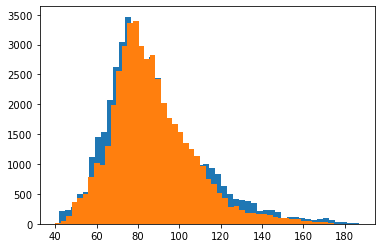

In [17]:
plt.hist(y_final,50)
plt.hist(y_final_pred,50)

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_final,y_final_pred)

6.885707910466651

In [20]:
import pandas as pd
df = pd.DataFrame({'original':y_final,'predicted':y_final_pred,'activity':y_activity_final})

In [21]:
df['error'] = df.apply(lambda a:abs(a['original']-a['predicted']),axis=1)

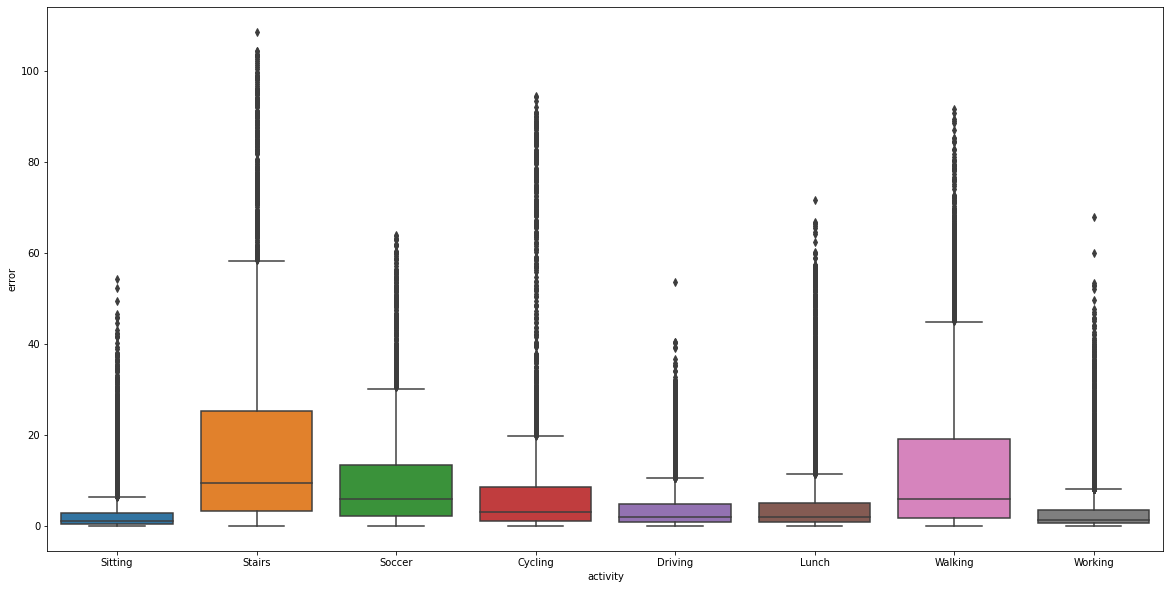

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='activity',y='error',data=df)
plt.show()

In [28]:
df.groupby('activity').mean()

,original,predicted,error
activity,,,
Cycling,123.189987,116.349083,10.072803
Driving,84.691901,84.832301,3.929810
Lunch,83.583718,83.488560,4.814460
Sitting,61.054328,63.495360,3.511651
Soccer,90.413321,88.373664,10.760305
Stairs,118.662853,109.933592,19.197405
Walking,99.239103,101.812054,13.778279
Working,76.369077,77.186452,3.516942
